<a href="https://colab.research.google.com/github/mngugi/SML-/blob/main/fast_ai_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 172MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.160442,0.025951,0.006766,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.053704,0.017046,0.006089,00:42


<Axes: >

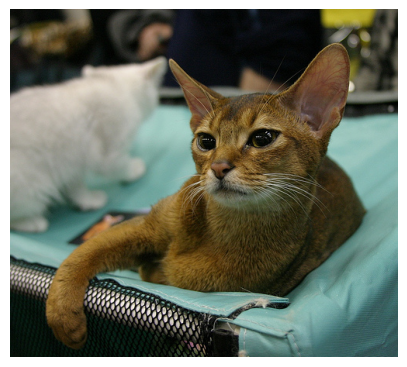

In [10]:
img = PILImage.create('/content/Abyssinian_85.jpg')
img.show()

In [11]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [12]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.928455,2.360234,00:01


epoch,train_loss,valid_loss,time
0,1.839694,1.602025,00:01
1,1.583990,1.208880,00:01
2,1.520957,1.195877,00:01
3,1.409107,1.044113,00:01
4,1.285587,0.905197,00:01
5,1.171623,0.791378,00:01
6,1.075759,0.740281,00:01
7,0.997555,0.734172,00:01


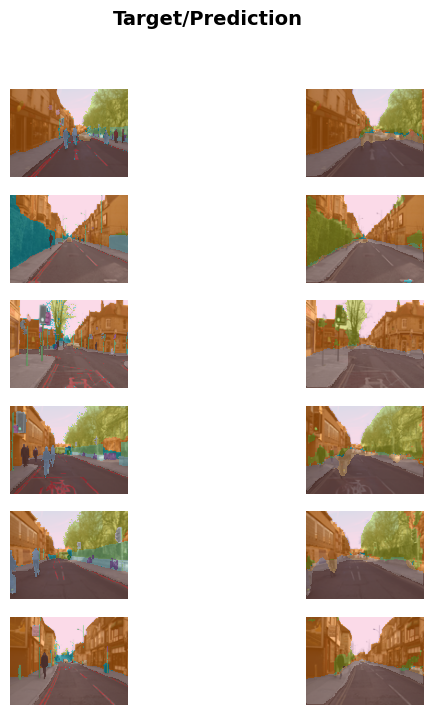

In [13]:
learn.show_results(max_n=6, figsize=(7,8))